## What is a beeswarm plot?

Imagine you want to know how your friends' height is distributed. To do this, you can use a **swarm plot**, which is a visual way of seeing individual data points (in this case, the height of your friends) and how they are distributed, with **no two data points overlapping** and all forming a neat line from shortest to tallest. It allows you to **quickly understand** the extent and distribution of data without losing any information.


## Libraries

Since [matplotlib](https://python-graph-gallery.com/matplotlib/) does not have a function for beeswarm plot, we will need to create our own. We will use (_slightly modified_) functions suggested by [MichaelClerx](https://stackoverflow.com/users/423420/michael-clerx) and [Roger Vadim](https://stackoverflow.com/users/6151828/roger-vadim) on Stackoverflow [here](https://stackoverflow.com/questions/36153410/how-to-create-a-swarm-plot-with-matplotlib).

First, you need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot customization purposes and display the chart
- `numpy` is used to generate some data and create the chart
- `pandas` is used to create a datafram from the numpy generated data


In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset

First, we need to create data with 2 groups. To do this, we take the following steps:

- Define the **sample size** per group. Given that we have two groups, there will be 50 people in each, for a total of 100.
- Create the data for each group (here, we give them a different mean with `loc=100` VS `loc=130`, in order to have sufficiently different groups)
- Create the list containing the **group name** for each observation
- Put all this data into a `pandas` dataframe

The categorical variable will only be used to **represent the distribution of several groups** on the same graph.


In [2]:
# Random variables following a normal distribution
sample_size = 100  # Define the size of the random data samples.
# Generate data points for 'Group 1'
data_group1 = np.random.normal(loc=100, scale=30, size=sample_size)
# Generate data points for 'Group 2'
data_group2 = np.random.normal(loc=130, scale=30, size=sample_size)
# Concatenate the data to create a combined dataset
data_combined = np.concatenate([data_group1, data_group2])
# List that indicates the category for each data point
category_feature = ['Group1'] * sample_size + ['Group2'] * sample_size

# Store this data into a pandas df
df = pd.DataFrame({'numerical_variable': data_combined,
                   'categorical_variable': category_feature})

## Basic beeswarm plot

The following code is a function that displays a simple `bee swarm` graphic, with a title and an axis name.

The main steps of the function involve **dividing the data into bins** based on the provided number of bins or a default value, calculating the upper bounds for each bin, and then arranging the data points in each bin to **create the horizontal spread** in the plot, ensuring they don't overlap.

The function ultimately returns the array `x`, which contains the x positions of the data points for the [beeswarm plot](https://python-graph-gallery.com/beeswarm/).

Once we have defined our function, the code sets up the `figure`, `subplot`, hides the x-axis, calculates the [beeswarm plot](https://python-graph-gallery.com/beeswarm/) using `simple_beeswarm()`, and then displays the plot using `plt.show()`. All these steps are necessary to create and show the beeswarm plot.


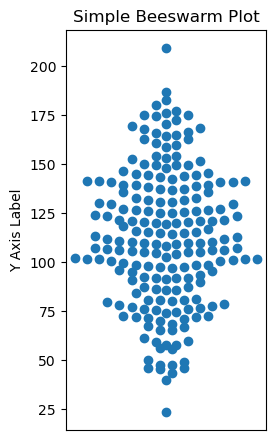

In [3]:
def simple_beeswarm(y, nbins=None):

    # Convert y to a NumPy array
    y = np.asarray(y)

    # Calculate the number of bins if not provided
    if nbins is None:
        nbins = len(y) // 6

    # Get upper and lower bounds of the data
    x = np.zeros(len(y))
    ylo = np.min(y)
    yhi = np.max(y)

    # Calculate the size of each bin based on the number of bins
    dy = (yhi - ylo) / nbins

    # Calculate the upper bounds of each bin using linspace
    ybins = np.linspace(ylo + dy, yhi - dy, nbins - 1)

    # Divide the indices into bins
    i = np.arange(len(y))
    ibs = [0] * nbins  # List to store indices for each bin
    ybs = [0] * nbins  # List to store values for each bin
    nmax = 0  # Variable to store the maximum number of data points in a bin
    for j, ybin in enumerate(ybins):

        # Create a boolean mask for elements that are less than or equal to the bin upper bound
        f = y <= ybin

        # Store the indices and values that belong to this bin
        ibs[j], ybs[j] = i[f], y[f]

        # Update nmax with the maximum number of elements in a bin so far
        nmax = max(nmax, len(ibs[j]))

        # Update i and y by excluding the elements already added to the current bin
        f = ~f
        i, y = i[f], y[f]

    # Add the remaining elements to the last bin
    ibs[-1], ybs[-1] = i, y
    nmax = max(nmax, len(ibs[-1]))

    # Assign x indices to the data points in each bin
    dx = 1 / (nmax // 2)

    for i, y in zip(ibs, ybs):
        if len(i) > 1:

            # Determine the index to start from based on whether the bin has an even or odd number of elements
            j = len(i) % 2

            # Sort the indices in the bin based on the corresponding values
            i = i[np.argsort(y)]

            # Separate the indices into two groups, 'a' and 'b'
            a = i[j::2]
            b = i[j+1::2]

            # Assign x values to the 'a' group using positive values and to the 'b' group using negative values
            x[a] = (0.5 + j / 3 + np.arange(len(b))) * dx
            x[b] = (0.5 + j / 3 + np.arange(len(b))) * -dx

    return x


# Create a figure with a size of 2 inches (width) by 4 inches (height)
fig = plt.figure(figsize=(2, 4))

# Adjust the subplots so that they fit nicely within the figure
fig.subplots_adjust(0.2, 0.2, 1.2, 1.2)

# Add a single subplot (axes) to the figure
ax = fig.add_subplot(1, 1, 1)
ax.get_xaxis().set_visible(False)  # Mask the x-axis

# Use the previously defined 'simple_beeswarm' function to get the x-axis positions for the beeswarm plot
y = df['numerical_variable']
x = simple_beeswarm(y)

# Plot the data points using circles 'o' at the calculated x and y positions
ax.plot(x, y, 'o')

# Set axis labels and a title
ax.set_ylabel("Y Axis Label")
ax.set_title("Simple Beeswarm Plot")

# Show the plot
plt.show()

## Beeswarm plot with multiple groups

In order to represent the distribution of several groups with a [beeswarm plot](https://python-graph-gallery.com/beeswarm/), we add a `width` argument to the original function.

Both functions (`simple_beeswarm()` and `simple_beeswarm2()`) create bee swarm plots to avoid overlapping points with the same values.

However, **they differ in their approach to dividing data into bins**:

- `simple_beeswarm` uses a manual calculation of bins boundaries
- `simple_beeswarm2` uses the numpy histogram (`np.histogram()`)

In addition, `simple_beeswarm2()` lets you control the width of the bins with the **width parameter**, while `simple_beeswarm()` uses a default number of bins and divides the data according to the size of each bin.

In this variant, in order to **represent several groups** on the same graph, we use a `for` loop to **iterate through the distinct labels** present in the categorical variable, **create a subset** of the relevant observations and display their distribution.


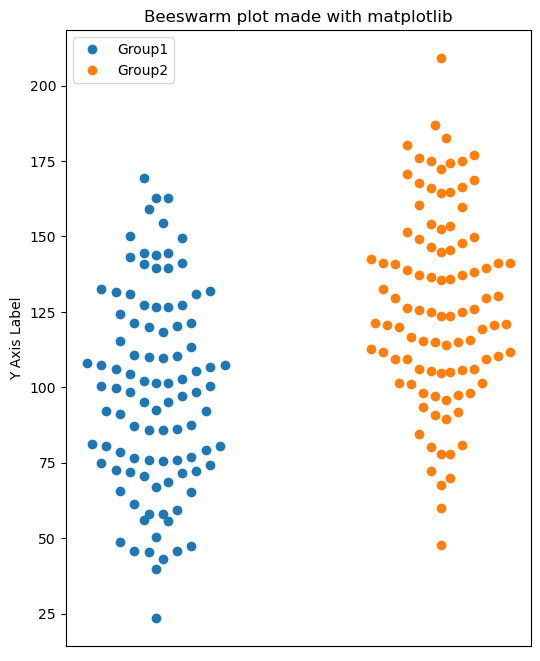

In [31]:
def simple_beeswarm2(y, nbins=None, width=1.):
    """
    Returns x coordinates for the points in ``y``, so that plotting ``x`` and
    ``y`` results in a bee swarm plot.
    """

    # Convert y to a numpy array to ensure it is compatible with numpy functions
    y = np.asarray(y)

    # If nbins is not provided, calculate a suitable number of bins based on data length
    if nbins is None:
        # nbins = len(y) // 6
        nbins = np.ceil(len(y) / 6).astype(int)

    # Get the histogram of y and the corresponding bin edges
    nn, ybins = np.histogram(y, bins=nbins)

    # Find the maximum count in any bin to be used in calculating the x positions
    nmax = nn.max()

    # Create an array of zeros with the same length as y, to store x-coordinates
    x = np.zeros(len(y))

    # Divide indices of y-values into corresponding bins
    ibs = []
    for ymin, ymax in zip(ybins[:-1], ybins[1:]):

        # Find the indices where y falls within the current bin
        i = np.nonzero((y > ymin) * (y <= ymax))[0]
        ibs.append(i)

    # Assign x-coordinates to the points in each bin
    dx = width / (nmax // 2)

    for i in ibs:
        yy = y[i]
        if len(i) > 1:

            # Determine the starting index (j) based on the number of elements in the bin
            j = len(i) % 2

            # Sort the indices based on their corresponding y-values
            i = i[np.argsort(yy)]

            # Separate the indices into two halves (a and b) for arranging the points
            a = i[j::2]
            b = i[j+1::2]

            # Assign x-coordinates to points in each half of the bin
            x[a] = (0.5 + j / 3 + np.arange(len(b))) * dx
            x[b] = (0.5 + j / 3 + np.arange(len(b))) * -dx

    return x


fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.get_xaxis().set_visible(False)  # Mask the x-axis

# Display each group:
count = 0
labels = ''
for group in df['categorical_variable'].unique():

    # Subset only observation from the group
    y = df[df['categorical_variable'] == group]['numerical_variable']

    # Get position of the observations
    x = simple_beeswarm2(y, width=0.25)

    # Plot
    ax.plot(x+count, y, 'o')

    # Moves each group 1 unit to the right for the next iteration (avoid overlapping)
    count += 1

# Add title and axis name
plt.title('Beeswarm plot made with matplotlib')
ax.set_ylabel("Y Axis Label")

# Add a legend with the name of each distinct label
ax.legend(df['categorical_variable'].unique())

# Display the chart
plt.show()

## Bonus: add boxplots for better vizualisation

To get an even clearer idea of the distribution of your data, it may be useful to add [box plots](https://python-graph-gallery.com/boxplot/) under the beeswarm plots, as suggested in the original function by Roger Vadim.

It's actually quite simple, with each iteration on the separate labels of the categorical variable:

- we **collect the values** of the group in question
- we **add them to a list** we've just initialized (`boxplot_data`)

We then display the boxplots using the [matplotlib](https://python-graph-gallery.com/matplotlib/) function `boxplot()`.


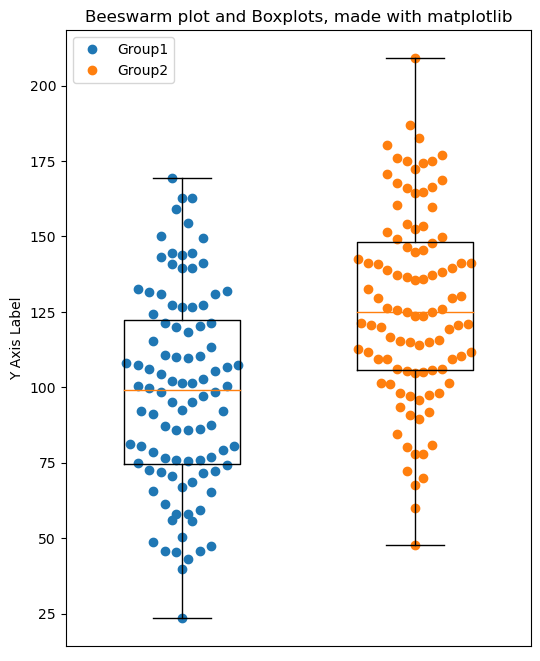

In [30]:
def simple_beeswarm2(y, nbins=None, width=1.):
    """
    Returns x coordinates for the points in ``y``, so that plotting ``x`` and
    ``y`` results in a bee swarm plot.
    """

    # Convert y to a numpy array to ensure it is compatible with numpy functions
    y = np.asarray(y)

    # If nbins is not provided, calculate a suitable number of bins based on data length
    if nbins is None:
        # nbins = len(y) // 6
        nbins = np.ceil(len(y) / 6).astype(int)

    # Get the histogram of y and the corresponding bin edges
    nn, ybins = np.histogram(y, bins=nbins)

    # Find the maximum count in any bin to be used in calculating the x positions
    nmax = nn.max()

    # Create an array of zeros with the same length as y, to store x-coordinates
    x = np.zeros(len(y))

    # Divide indices of y-values into corresponding bins
    ibs = []
    for ymin, ymax in zip(ybins[:-1], ybins[1:]):

        # Find the indices where y falls within the current bin
        i = np.nonzero((y > ymin) * (y <= ymax))[0]
        ibs.append(i)

    # Assign x-coordinates to the points in each bin
    dx = width / (nmax // 2)

    for i in ibs:
        yy = y[i]
        if len(i) > 1:

            # Determine the starting index (j) based on the number of elements in the bin
            j = len(i) % 2

            # Sort the indices based on their corresponding y-values
            i = i[np.argsort(yy)]

            # Separate the indices into two halves (a and b) for arranging the points
            a = i[j::2]
            b = i[j+1::2]

            # Assign x-coordinates to points in each half of the bin
            x[a] = (0.5 + j / 3 + np.arange(len(b))) * dx
            x[b] = (0.5 + j / 3 + np.arange(len(b))) * -dx

    return x


fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.get_xaxis().set_visible(False)  # Mask the x-axis

# Display each group:
count = 1
boxplot_data = []
for group in df['categorical_variable'].unique():

    # Subset only observation from the group
    y = df[df['categorical_variable'] == group]['numerical_variable']

    # Get position of the observations
    x = simple_beeswarm2(y, width=0.25)

    # Plot
    ax.plot(x+count, y, 'o')

    # Moves each group 1 unit to the right for the next iteration (avoid overlapping)
    count += 1
    # Add the values of the group to the `boxplot_data` variable
    boxplot_data.append(y)

# Add the boxplots
ax.boxplot(boxplot_data,
           widths=0.5,  # Boxplots width
           )

# Add title and axis name
plt.title('Beeswarm plot and Boxplots, made with matplotlib')
ax.set_ylabel("Y Axis Label")

# Add a legend with the name of each distinct label
ax.legend(df['categorical_variable'].unique())

# Display the chart
plt.show()

## Going further

This article explains how to create a beeswarm plot with [matplotlib](https://python-graph-gallery.com/matplotlib/) with various customization features, such as plotting multiple groups or adding a boxplot beneath the main plot.

For more examples of **how to create or customize** your beeswarm plots with Python, see the [beeswarm plot section](https://python-graph-gallery.com/beeswarm/). You may also be interested in creating a [beeswarm plot with Seaborn](https://python-graph-gallery.com/505-introduction-to-swarm-plot-in-seaborn/).
